In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("diabetic_data.csv",header='infer')
df.drop(['race','encounter_id','patient_nbr'],axis=1,inplace=True)
dm = df[['time_in_hospital','A1Cresult','readmitted','max_glu_serum','age','gender','admission_type_id','admission_source_id','discharge_disposition_id']].copy()

In [ ]:
df.head(10)

,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,45
2,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,45
6,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
7,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,45
8,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
9,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


AttributeError: ignored

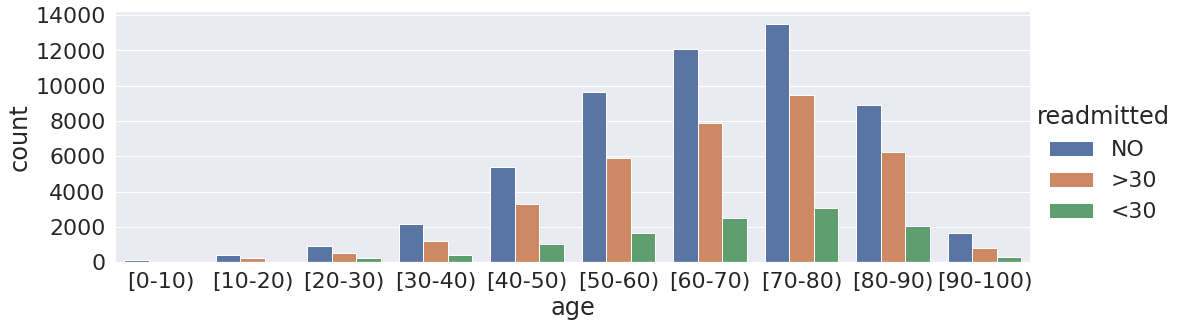

In [ ]:
u = sns.catplot(x='age', hue='readmitted', data=df,kind='count',height=5, aspect=3)
sns.set(font_scale = 1)

In [ ]:
df.corr(method ='kendall')

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.018168,-0.371450,-0.012031,-0.174025,0.182740,0.066435,0.026815,-0.030431,-0.040097,-0.106589
discharge_disposition_id,0.018168,1.000000,0.036284,0.220717,0.045104,0.011513,0.132740,0.029862,0.006458,0.075097,0.126738
admission_source_id,-0.371450,0.036284,1.000000,0.002190,0.109822,-0.175160,-0.049534,0.022290,0.097074,0.050628,0.090023
time_in_hospital,-0.012031,0.220717,0.002190,1.000000,0.243188,0.149482,0.345351,-0.011163,-0.000799,0.075674,0.185409
num_lab_procedures,-0.174025,0.045104,0.109822,0.243188,1.000000,0.016833,0.173642,-0.018929,0.004838,0.032400,0.126107
num_procedures,0.182740,0.011513,-0.175160,0.149482,0.016833,1.000000,0.270156,-0.021003,-0.041193,-0.054963,0.055386
num_medications,0.066435,0.132740,-0.049534,0.345351,0.173642,0.270156,1.000000,0.060140,0.035891,0.078840,0.224097
number_outpatient,0.026815,0.029862,0.022290,-0.011163,-0.018929,-0.021003,0.060140,1.000000,0.170182,0.144881,0.099585
number_emergency,-0.030431,0.006458,0.097074,-0.000799,0.004838,-0.041193,0.035891,0.170182,1.000000,0.209365,0.082364
number_inpatient,-0.040097,0.075097,0.050628,0.075674,0.032400,-0.054963,0.078840,0.144881,0.209365,1.000000,0.117210


On peut remarquer que la majorité des individus étudiés ont entre 50 et 80 ans

In [ ]:
sns.set(rc={'figure.figsize':(21,8)})
dm['A1Cresult'].replace({">8":8.5,">7":7.5,"None":0, "Norm":5}, inplace=True)
dm['readmitted'].replace({"NO":0, "<30":15,">30":45}, inplace=True)
dm=dm[dm.A1Cresult !=0 ]

Text(0, 0.5, "Taux d'A1C (en %)")

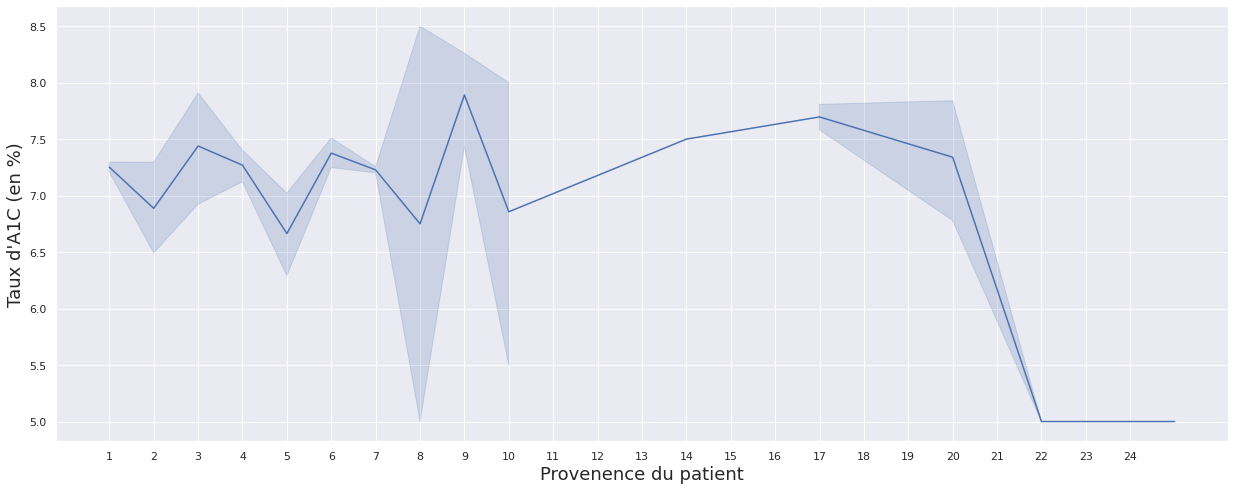

In [ ]:
h = sns.lineplot(data=dm, x="admission_source_id", y="A1Cresult")
plt.xticks(range(1,25))
plt.xlabel("Provenence du patient",fontsize=18)
plt.ylabel("Taux d'A1C (en %)",fontsize=18)

([<matplotlib.axis.XTick at 0x7fc0414d2590>,
 <a list of 8 Text major ticklabel objects>)

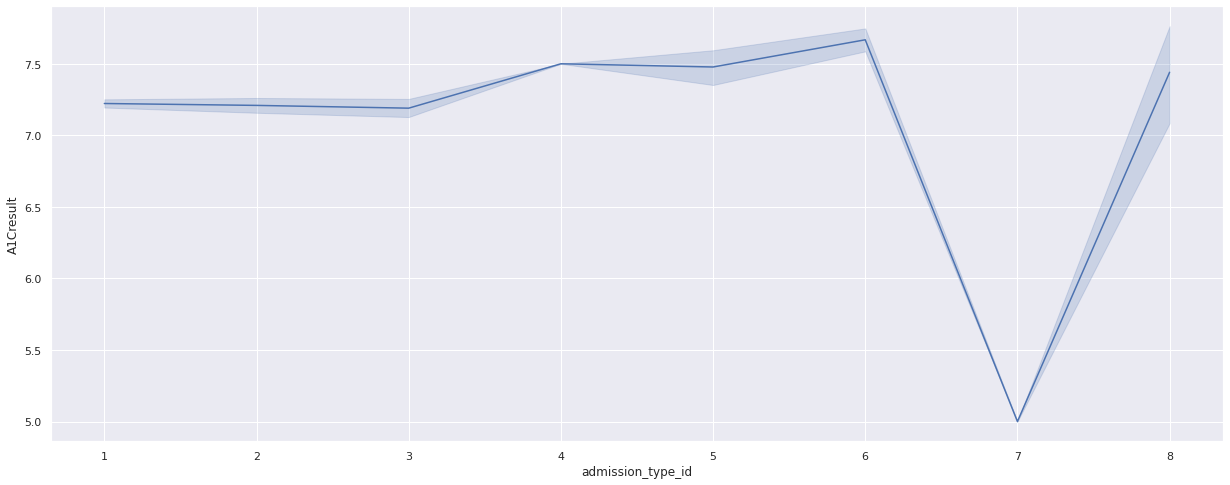

In [ ]:
h = sns.lineplot(data=dm, x="admission_type_id", y="A1Cresult")
plt.xticks(range(1,9))

I've replaced "Normal" ac1 level to 5%, >7 to 7.5% and >8 to 8.5%. Il y a une plus petite dépendance avec le motif d'admission.

In [ ]:
dm['max_glu_serum'].replace({">200":250,">300":350,"None":0, "Norm":85}, inplace=True)
dm=dm[dm.max_glu_serum !=0 ]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


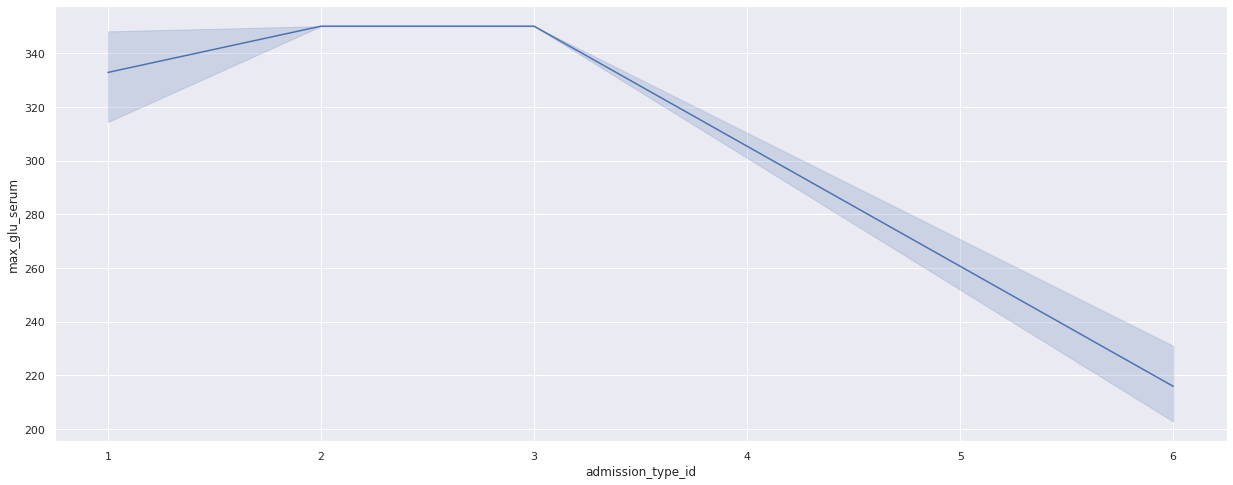

In [ ]:
h = sns.lineplot(data=dm, x="admission_type_id", y="max_glu_serum")

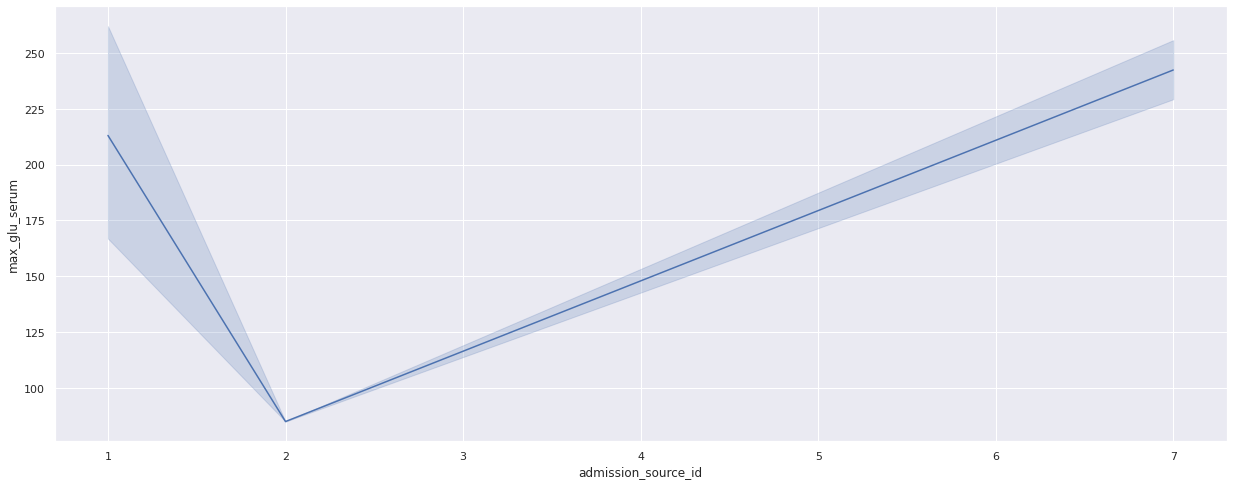

In [ ]:
h = sns.lineplot(data=dm, x="admission_source_id", y="max_glu_serum")

Text(0, 0.5, 'Pourcentage de réadmission')

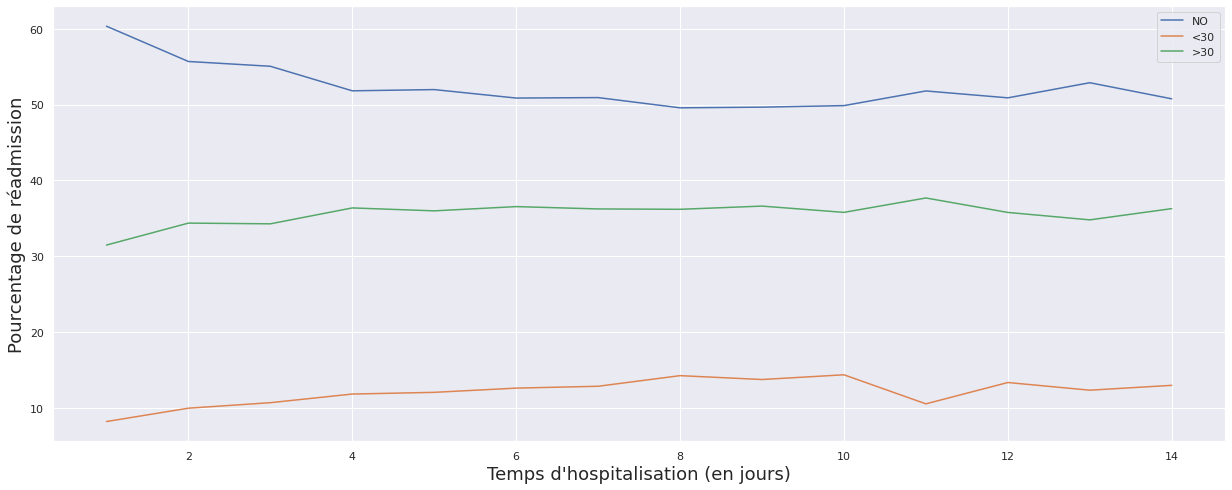

In [ ]:
l = []
for i in range(1,15):
  total = dm[dm.time_in_hospital==i].count()
  no = dm[(dm.readmitted == 'NO') & (dm.time_in_hospital==i)].count()
  l.append(no[1]/total[1]*100)
plt.plot(range(1,15), l, label='NO')
l=[]
for i in range(1,15):
  total = dm[dm.time_in_hospital==i].count()
  no = dm[(dm.readmitted == '<30') & (dm.time_in_hospital==i)].count()
  l.append(no[1]/total[1]*100)
plt.plot(range(1,15), l, label='<30')
l=[]
for i in range(1,15):
  total = dm[dm.time_in_hospital==i].count()
  no = dm[(dm.readmitted == '>30') & (dm.time_in_hospital==i)].count()
  l.append(no[1]/total[1]*100)
plt.plot(range(1,15), l, label='>30')
plt.legend()
plt.xlabel("Temps d'hospitalisation (en jours)", fontsize=18)
plt.ylabel("Pourcentage de réadmission", fontsize=18)

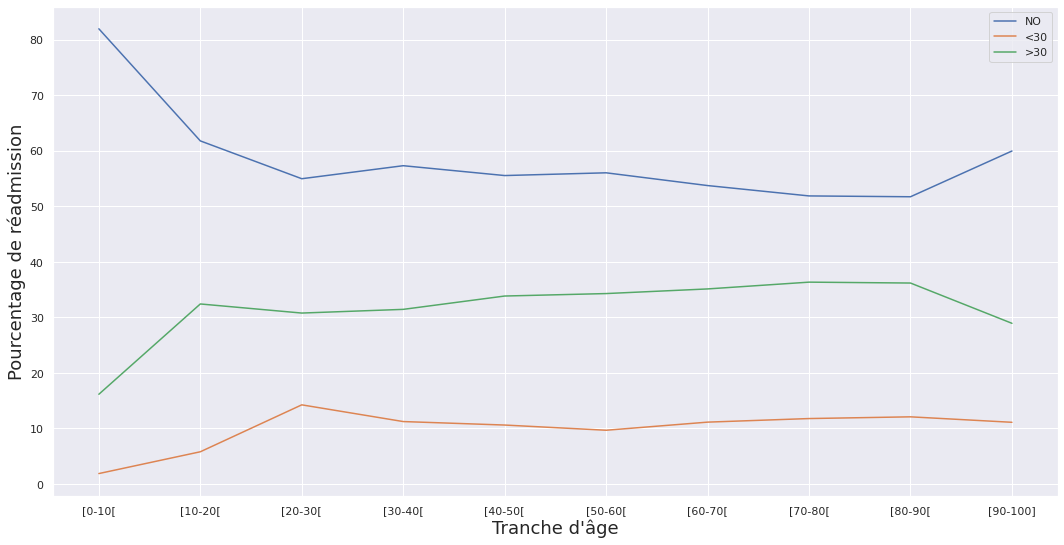

In [ ]:
ag = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']
ti = ['[0-10[','[10-20[','[20-30[','[30-40[','[40-50[','[50-60[','[60-70[','[70-80[','[80-90[','[90-100]']

l=[]
fig, ax = plt.subplots(figsize = (18,9))
for i in ag:
  total = dm[dm.age==i].count()
  no = dm[(dm.readmitted == 'NO') & (dm.age==i)].count()
  l.append(no[1]/total[1]*100)

plt.plot(ag,l, label='NO')
l=[]
for i in ag:
  total = dm[dm.age==i].count()
  no = dm[(dm.readmitted == '<30') & (dm.age==i)].count()
  l.append(no[1]/total[1]*100)
plt.plot(ag,l, label='<30')
l=[]
for i in ag:
  total = dm[dm.age==i].count()
  no = dm[(dm.readmitted == '>30') & (dm.age==i)].count()
  l.append(no[1]/total[1]*100)
plt.plot(ag,l, label='>30')
plt.legend()
ax.set_xticklabels(ti)
plt.xlabel("Tranche d'âge", fontsize=18)
plt.ylabel("Pourcentage de réadmission", fontsize=18)
plt.xticks
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packa

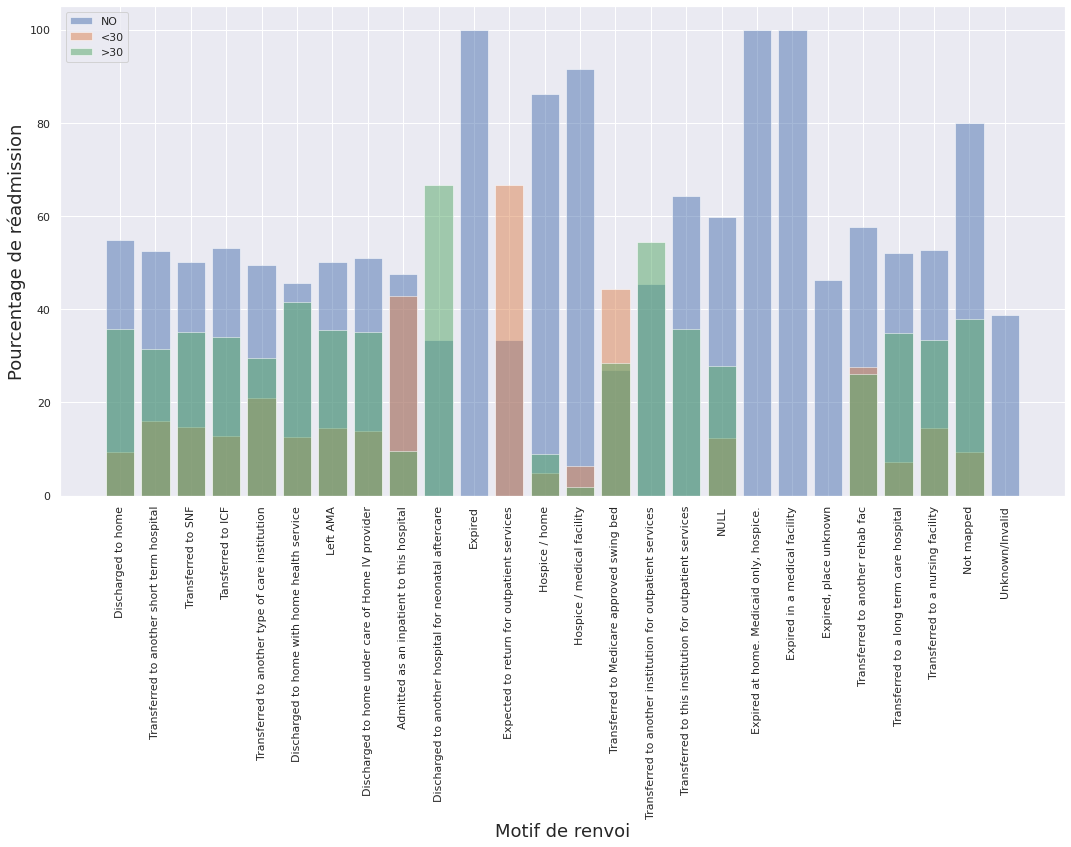

In [ ]:
ag=range(1,31)
l=[]
fig, ax = plt.subplots(figsize = (18,9))
for i in ag:
  total = dm[dm.discharge_disposition_id==i].count()
  no = dm[(dm.readmitted == 'NO') & (dm.discharge_disposition_id==i)].count()
  l.append(no[1]/total[1]*100)
l = [x for x in l if str(x) != 'nan']
temp = len(l)
ag = range(1,temp+1)
plt.bar(ag,l, label='NO', alpha=0.5)
m=[]
for i in ag:
  total = dm[dm.discharge_disposition_id==i].count()
  no = dm[(dm.readmitted == '<30') & (dm.discharge_disposition_id==i)].count()
  m.append(no[1]/total[1]*100)
temp = len(m)
ag = range(1,temp+1)
plt.bar(ag,m, label='<30',alpha=0.5)
n=[]
for i in ag:
  total = dm[dm.discharge_disposition_id==i].count()
  no = dm[(dm.readmitted == '>30') & (dm.discharge_disposition_id==i)].count()
  n.append(no[1]/total[1]*100)
temp = len(n)
ag = range(1,temp+1)
plt.bar(ag,n, label='>30',alpha=0.5)
lab = ["Discharged to home", "Transferred to another short term hospital","Transferred to SNF","Tansferred to ICF","Transferred to another type of care institution","Discharged to home with home health service","Left AMA","Discharged to home under care of Home IV provider","Admitted as an inpatient to this hospital","Discharged to another hospital for neonatal aftercare","Expired","Expected to return for outpatient services","Hospice / home","Hospice / medical facility","Transferred to Medicare approved swing bed","Transferred to another institution for outpatient services","Transferred to this institution for outpatient services","NULL","Expired at home. Medicaid only, hospice.","Expired in a medical facility","Expired, place unknown","Transferred to another rehab fac","Transferred to a long term care hospital","Transferred to a nursing facility","Not mapped","Unknown/Invalid","Transferred to a federal health care facility.","Transferred to a psychiatric hospital","Transferred to a Critical Access Hospital","Transferred to another Type of Health Care Institution"]
plt.xticks(ag)
plt.legend()
ax.set_xticklabels(lab, rotation=90)
#plt.figure(figsize=(8,9))
plt.xlabel("Motif de renvoi", fontsize=18)
plt.ylabel("Pourcentage de réadmission", fontsize=18)
plt.show()


In [ ]:
l = [x for x in l if str(x) != 'nan']
l

[54.977255370720854,
 52.537593984962406,
 50.10749605847785,
 53.128834355828225,
 49.5777027027027,
 45.74484576034723,
 50.08025682182986,
 50.92592592592593,
 47.61904761904761,
 33.33333333333333,
 100.0,
 33.33333333333333,
 86.21553884711778,
 91.66666666666666,
 26.984126984126984,
 45.45454545454545,
 64.28571428571429,
 59.73990788404227,
 100.0,
 100.0,
 46.261916708479674,
 57.76699029126213,
 52.083333333333336,
 52.679474216380186,
 80.0,
 38.84892086330935]

In [ ]:
df['readmitted'].replace({"NO":0, "<30":15,">30":45}, inplace=True)

[Text(0, 0, 'None'),
 Text(0, 0, 'Norm'),
 Text(0, 0, '>200'),
 Text(0, 0, '>300')]

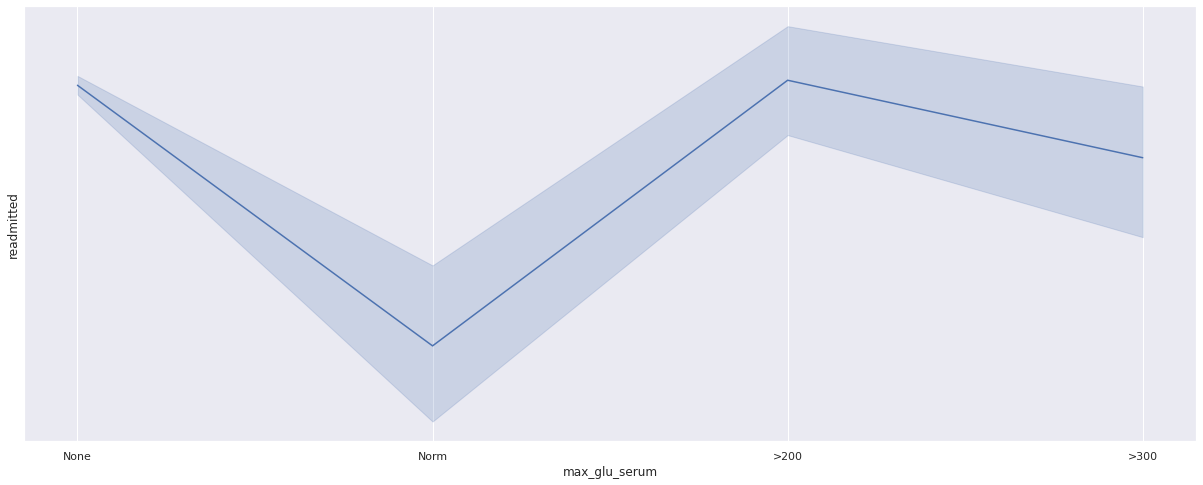

In [ ]:
g = sns.lineplot(data=dm, x="max_glu_serum", y="readmitted")
g.set_xticklabels(['None','Norm','>200','>300'])

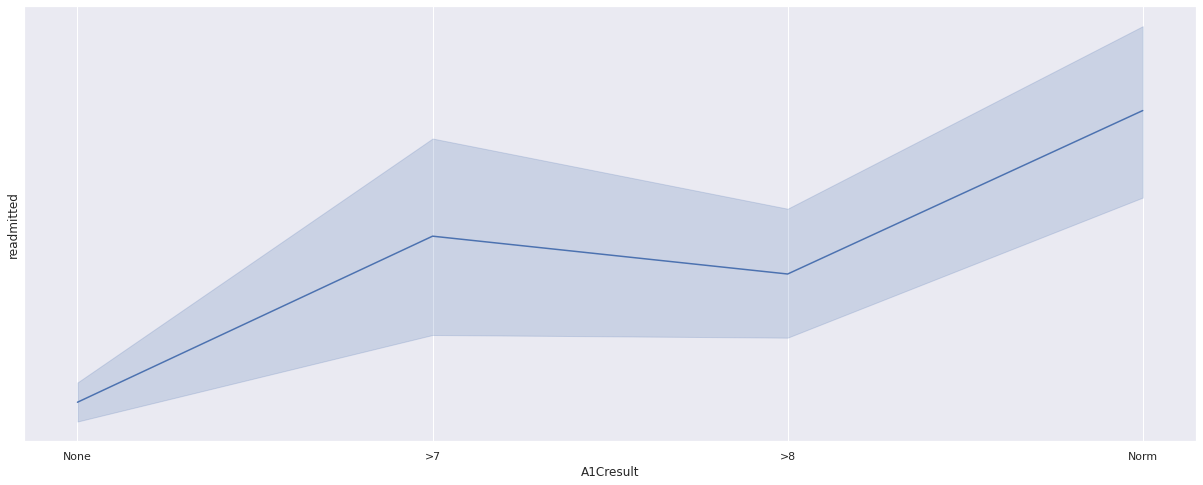

In [ ]:
g = sns.lineplot(data=dm, x="A1Cresult", y="readmitted")

J'ai changé l'ordre des x_labels car un taux de glucose 'normal' est à environ 140 mg/dL. 
On voit ici qu'une personne testée à un taux >200 mg/dL a plus de chances d'être réadmise qu'une personne à >300 mg/dL

J'ai aussi changé readmitted "NO" to 0, <30 to 15 and >30 to 45

On voit ici que moins la personne à passé de temps à l'hopital moins elle a de chances d'être réadmise. Cela peut s'expliquer par le fait que les personnes qui ne restent pas longtemps viennent seulement pour des contrôles ou des problèmes mineurs


On voit ici que plus la personne est agée, plus elle a de chances d'être réadmise. Cela peut s'expliquer par le fait que les personnes agées sont plus fragiles et que les complications ne surviennent pas souvent en bas âge.

Les pourcentages changent clairement selon le motif de renvoi
